### CS156 Pre-Class Work for Session 9.1

#### Gausian Processes

## 1 Iterative predictions

Write a function to generate synthetic data more meaningful than pure random noise (e.g. a sine function with noise added to it). Choose a covariance function that is sensible for your synthetic data.

Write a program that shows the following steps:

1. Observes a new synthetic datapoint
2. Plots the entire dataset, and 10 samples of the posterior Gaussian Process.
3. Pause for 5 seconds
4. Go to 1 and repeat.

In [0]:
import sys

!pip install GPy
import GPy
import time
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display

%matplotlib inline
GPy.plotting.change_plotting_library('matplotlib')

    100% |████████████████████████████████| 880kB 9.1MB/s 
    100% |████████████████████████████████| 71kB 17.0MB/s 
  Running setup.py bdist_wheel for GPy ... - \ | / - \ | / - \ | / - \ | / - \ | / done
  Stored in directory: /root/.cache/pip/wheels/97/82/1d/32a361e1ff2b4d9129a60343831dd99cdc74440e2db1c55264
  Running setup.py bdist_wheel for paramz ... - \ done
  Stored in directory: /root/.cache/pip/wheels/a9/fc/74/3bbd263c43ed98d67343df24cebf0a0ee34afee40d769fda9c
Successfully built GPy paramz


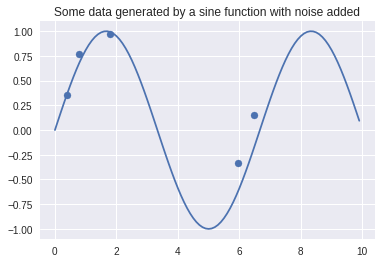

In [0]:
def observe_data(sample_size): #sample size is a tuple with data dimensions
    X = np.random.uniform(0,10.,(sample_size,1))
    Y = np.sin(X) + np.random.randn(sample_size,1)*0.05
    return X,Y

x_lab, data = observe_data(5)

#plotting the underlying sine function
fs = 10.0
f = 1.5
x = np.arange(fs,step=0.1)
y = [ np.sin(2*np.pi*f * (i/fs)) for i in x]
    
plt.scatter(x_lab, data)
plt.title("Some data generated by a sine function with noise added")
plt.plot(x,y)
plt.show()

In [0]:
kernel = GPy.kern.RBF(input_dim=1, variance=1., lengthscale=1.)

def posterior_generator(runs, X_prior, y_prior, kernel, verbose=False):
    print("Original model")
    model = GPy.models.GPRegression(X_prior, y_prior, kernel)
    fig = model.plot()
    plt.show(fig)
    
    if verbose:
        print("Starting optimization procedure")
    for i in range(runs):
        X_new, y_new = observe_data(1)
        
        X_posterior = np.reshape(np.append(X_prior, X_new), (len(X_prior)+1,1))
        y_posterior = np.reshape(np.append(y_prior, y_new), (len(y_prior)+1,1))
        
        posterior_model = GPy.models.GPRegression(X_posterior, y_posterior, kernel)

        posterior_model.optimize(messages=False, max_iters=5)
        
        if verbose:
            print("New data point is: ", X_new, y_new)
            print("Here's the new model after %d runs:" %(i+1))
            figure = posterior_model.plot()
            plt.show(figure)
            print("Short break (3s)")
            time.sleep(3)
        
        #new prior
        X_prior = X_posterior
        y_prior = y_posterior
        

    print("This is the best we got with %d runs." %(i+1))
    figure = posterior_model.plot()
    plt.show(figure)



Original model


 /usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:2022: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


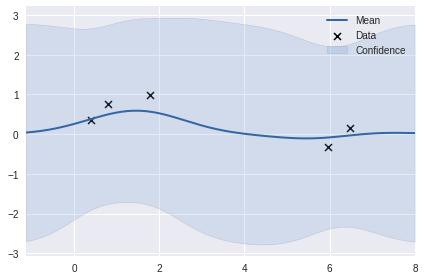

Starting optimization procedure
New data point is:  [[2.41295678]] [[0.62695384]]
Here's the new model after 1 runs:


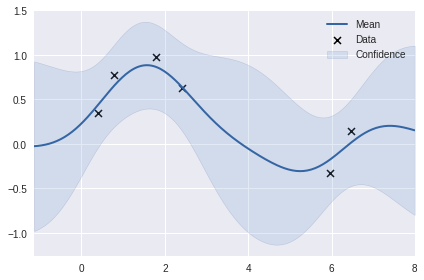

Short break (3s)
New data point is:  [[7.75524694]] [[1.02743745]]
Here's the new model after 2 runs:


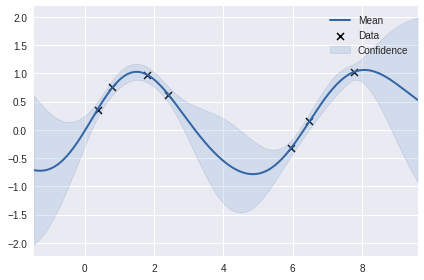

Short break (3s)
New data point is:  [[3.43783625]] [[-0.3174951]]
Here's the new model after 3 runs:


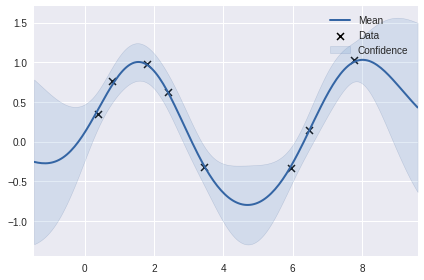

Short break (3s)
New data point is:  [[5.82258078]] [[-0.43301235]]
Here's the new model after 4 runs:


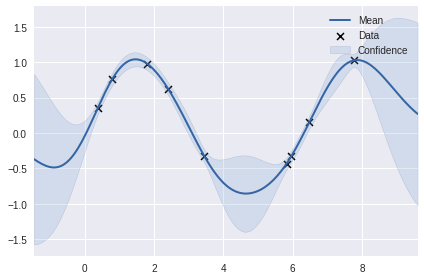

Short break (3s)
New data point is:  [[1.44928527]] [[0.94968657]]
Here's the new model after 5 runs:


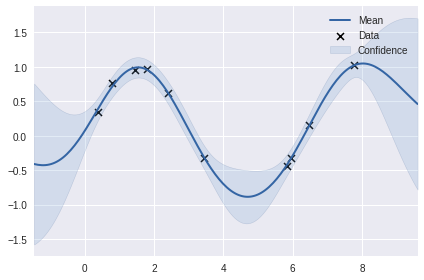

Short break (3s)
This is the best we got with 5 runs.


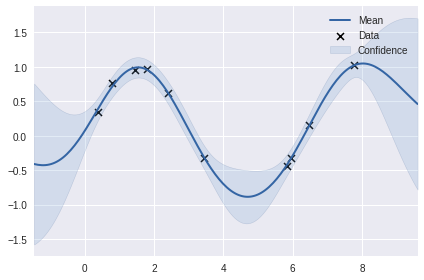

In [0]:
posterior_generator(5, x_lab, data, kernel, verbose=True)